<a href="https://colab.research.google.com/github/Ankit-Kumar20/DS_implementation/blob/main/tele_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
import missingno as msno

<Axes: >

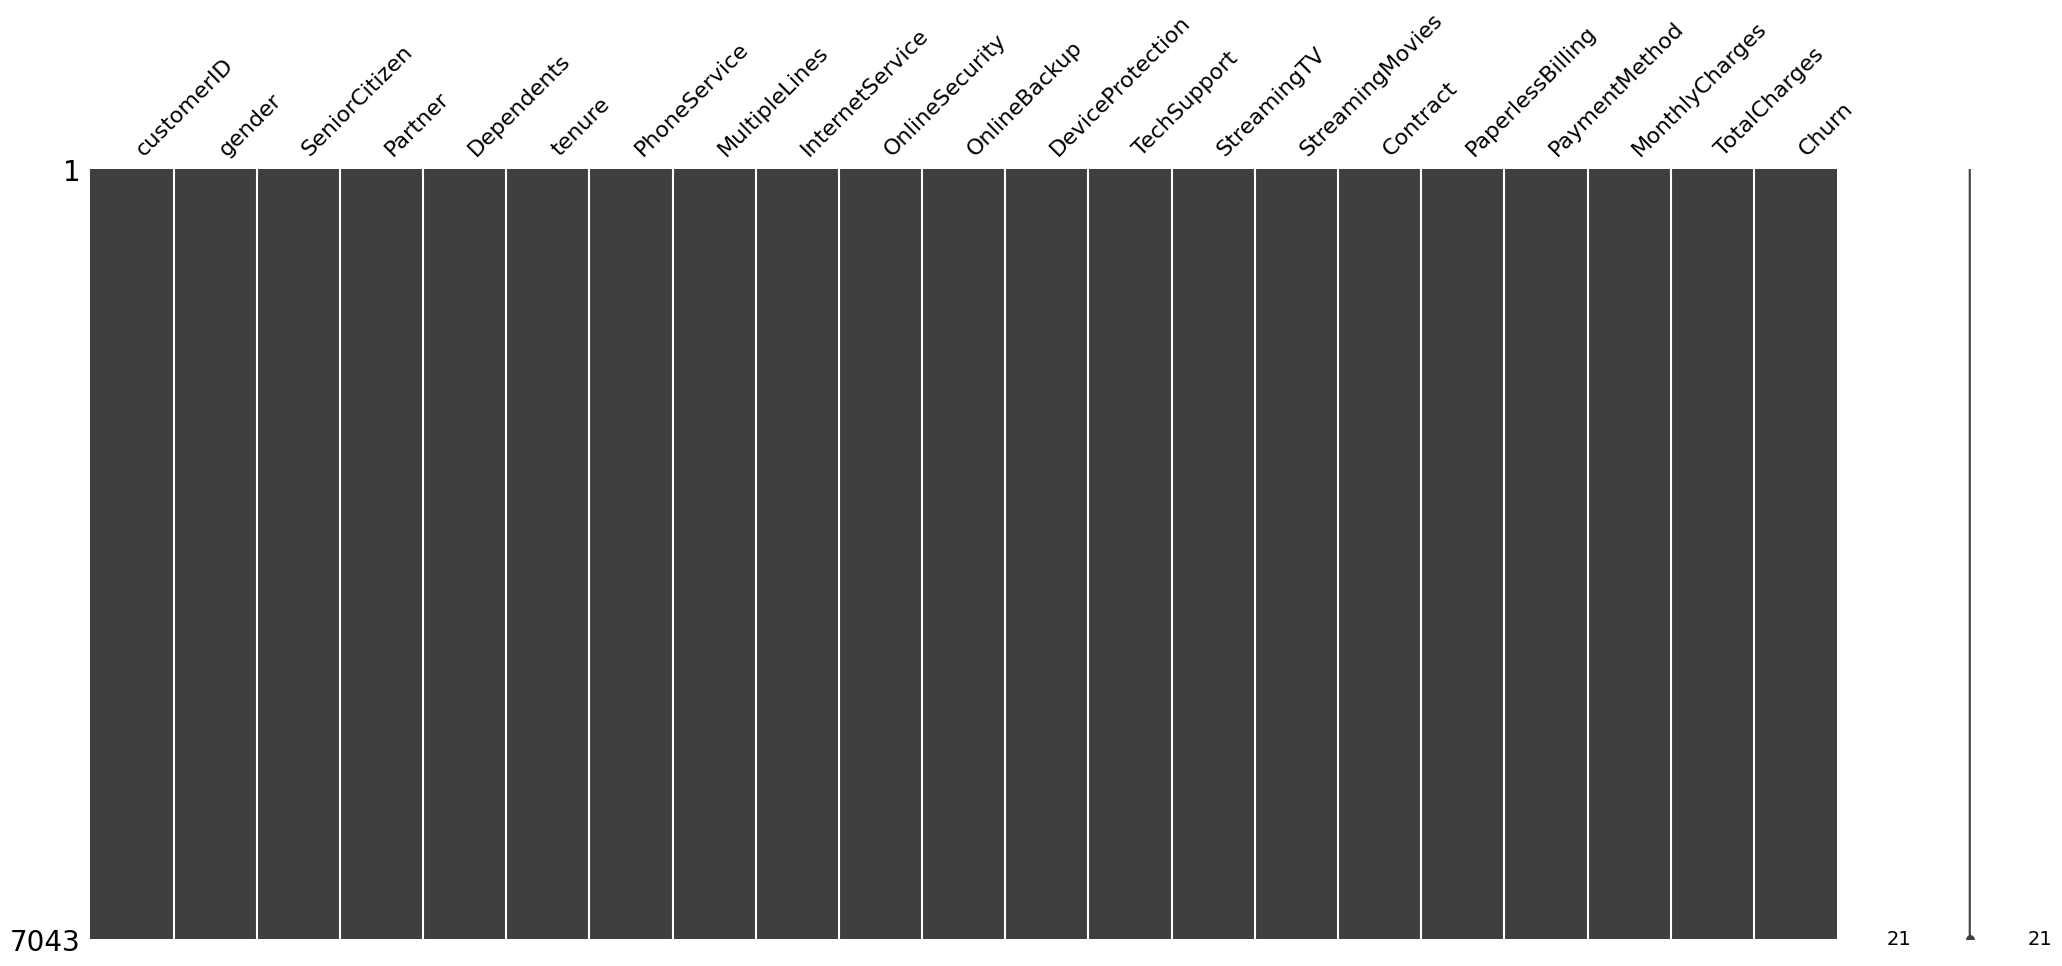

In [ ]:
msno.matrix(df)

In [ ]:
for i in range(0, df['tenure'].size):
  if(df['tenure'][i] == 0):
    print(True)

True
True
True
True
True
True
True
True
True
True
True


In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [ ]:
import numpy as np
import seaborn as sns

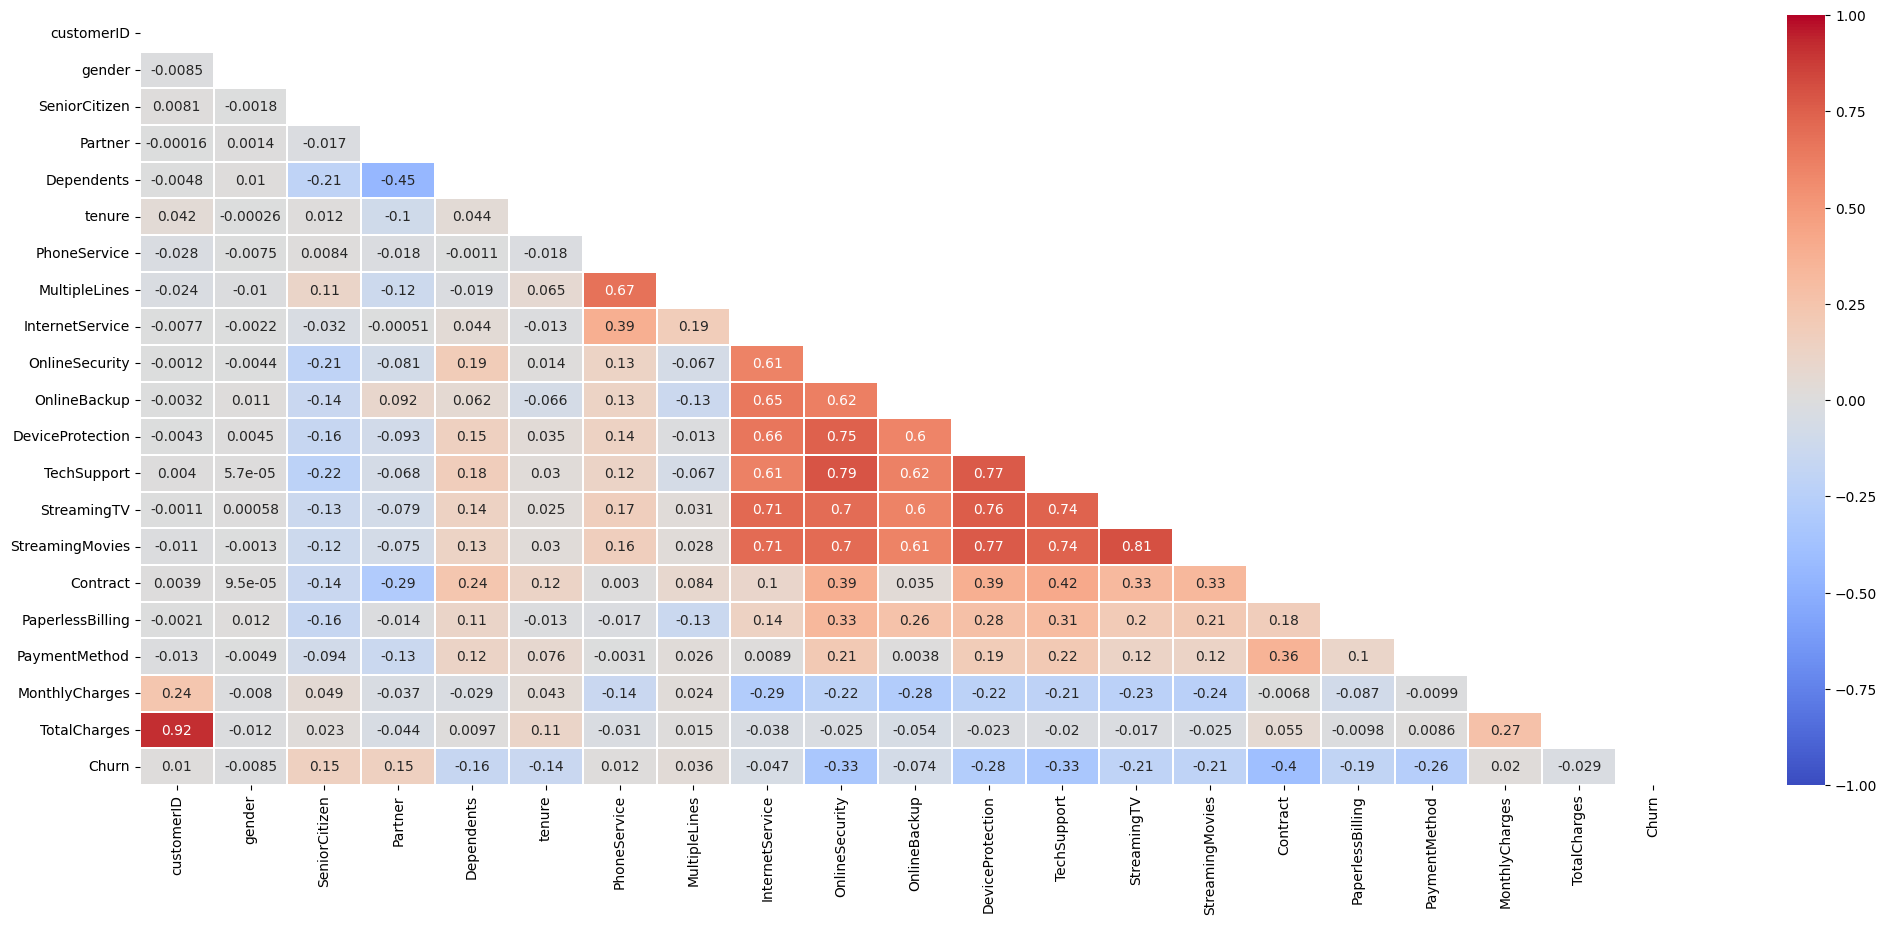

In [ ]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns,
annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
df.drop(columns = ['customerID'], inplace=True)

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
for col in ['Partner', 'Dependents', 'PhoneService', 'Churn']:
    df[col].replace({'Yes': 1, 'No': 0}, inplace = True)
df['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 0}, inplace = True)
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']:
    df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace = True)

/tmp/ipython-input-23-3904901342.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
/tmp/ipython-input-23-3904901342.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
/tmp/ipy

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [ ]:
df = pd.get_dummies(df, columns = ['InternetService'])
df['InternetService_Fiber optic'].replace({True: 1, False: 0}, inplace = True)
df['InternetService_No'].replace({True: 1, False: 0}, inplace = True)
df['InternetService_DSL'].replace({True: 1, False: 0}, inplace = True)

/tmp/ipython-input-25-2354171457.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['InternetService_Fiber optic'].replace({True: 1, False: 0}, inplace = True)
/tmp/ipython-input-25-2354171457.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['InternetService_Fiber optic'].replace({True: 1,

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.5,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0


In [ ]:
df.shape

(7032, 22)

In [ ]:
type(df['tenure'][0])

numpy.int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
order = ['Month-to-month', 'One year', 'Two year']
encoder = OrdinalEncoder(categories=[order])
df['Contract'] = encoder.fit_transform(df[['Contract']])

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,0,0.0,1,Electronic check,29.85,29.85,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1.0,0,Mailed check,56.95,1889.5,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,0,0.0,1,Mailed check,53.85,108.15,1,1,0,0


In [ ]:
df = pd.get_dummies(df, columns = ['PaymentMethod'])

In [ ]:

df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.5,0,1,0,0,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,False,False,False,True


In [ ]:
ls = ['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
for col in ls:
    df[col].replace({True: 1, False: 0}, inplace = True)


/tmp/ipython-input-34-3118617009.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({True: 1, False: 0}, inplace = True)
/tmp/ipython-input-34-3118617009.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({True: 1, False: 0}, inplace = True)


In [ ]:
df.shape

(7032, 25)

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.5,0,1,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1


In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [ ]:
X = df.drop(columns = ['Churn'])
Y = df['Churn']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()

# Convert 'TotalCharges' to numeric, coercing errors to NaN and then filling NaN with 0
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
X['TotalCharges'].fillna(0, inplace=True)

X_scaled = pd.DataFrame(std_scaler.fit_transform(X))

/tmp/ipython-input-40-2780506669.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['TotalCharges'].fillna(0, inplace=True)


In [ ]:
X_scaled.head(3)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,-0.854336,-0.633746,1.378330,-0.723918,...,0.828939,-1.161694,-0.994194,1.382243,-0.886896,-0.52513,-0.529976,-0.525351,1.404764,-0.543604
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.854336,1.577918,-0.725516,1.381372,...,-1.206361,-0.260878,-0.173740,1.382243,-0.886896,-0.52513,-0.529976,-0.525351,-0.711863,1.839576
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,1.577918,1.378330,-0.723918,...,0.828939,-0.363923,-0.959649,1.382243,-0.886896,-0.52513,-0.529976,-0.525351,-0.711863,1.839576


In [ ]:
X_scaled.shape

(7032, 24)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=40)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of y_test:", Y_test.shape)

Shape of X_train: (4922, 24)
Shape of X_test: (2110, 24)
Shape of y_train: (4922,)
Shape of y_test: (2110,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
k_value_ls = []
for k in range(1, 100):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  k_value_ls.append(accuracy_score(Y_test, y_pred))

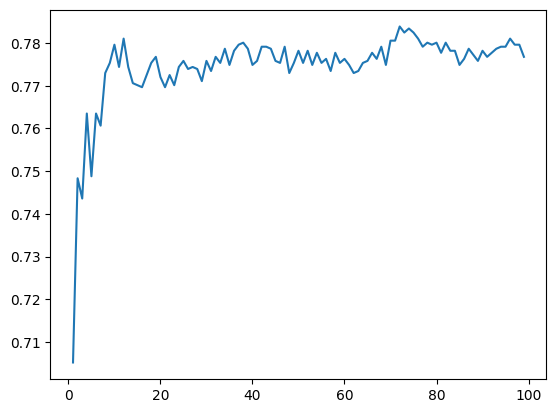

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 100), k_value_ls)

In [ ]:
k_value = k_value_ls.index(max(k_value_ls))+1
print(k_value)

72


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors = k_value)
KNN_model.fit(X_train, Y_train)
y_pred = KNN_model.predict(X_test)

In [ ]:
print("accuracy_score", accuracy_score(Y_test, y_pred))
print("classification_report", classification_report(Y_test, y_pred))

accuracy_score 0.7838862559241706
classification_report               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1557
           1       0.60      0.53      0.56       553

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.78      0.78      2110



In [ ]:
# Calculate the variance of each feature in the training data
variances = X_train.var()

# Display the variances
print("Feature Variances:")
print(variances)

Feature Variances:
0     1.000271
1     1.003896
2     1.000148
3     0.997385
4     1.005677
5     1.005901
6     1.002275
7     1.000464
8     0.998420
9     0.996097
10    0.998175
11    0.998815
12    1.001618
13    0.996613
14    1.001650
15    1.014754
16    1.015103
17    0.991563
18    1.001074
19    1.014452
20    1.009280
21    0.998424
22    0.995580
23    1.002892
dtype: float64


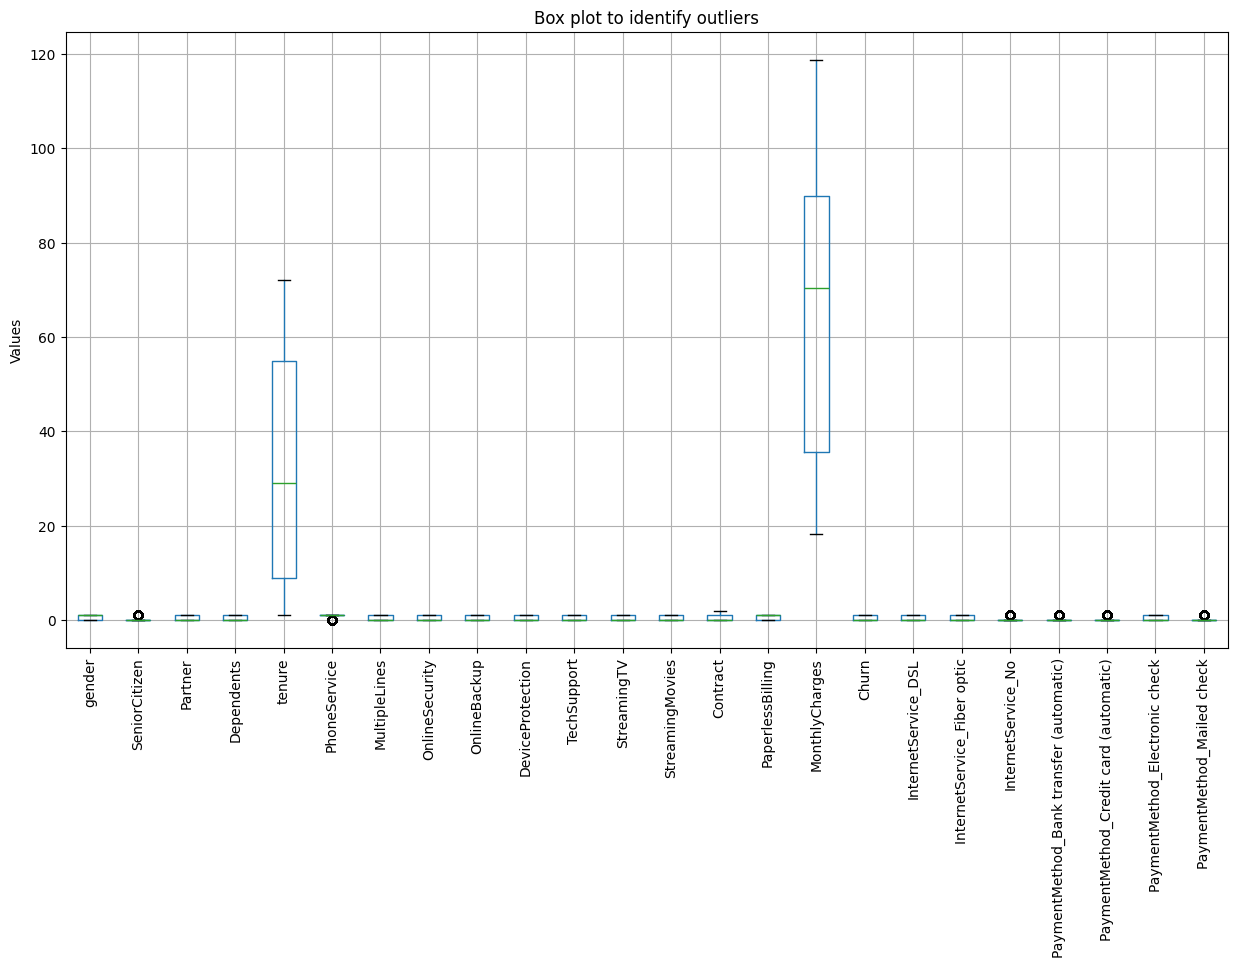

In [ ]:
import matplotlib.pyplot as plt

# Create a box plot for the DataFrame
plt.figure(figsize=(15, 8)) # Adjust figure size for better readability
df.boxplot()
plt.title('Box plot to identify outliers')
plt.ylabel('Values')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
ran_state_accu = []
for ran in range(1, 100):
  dtree_model = DecisionTreeClassifier(criterion='gini', random_state= ran)
  dtree_model.fit(X_train, Y_train)
  ran_state_accu.append(dtree_model.score(X_test, Y_test))

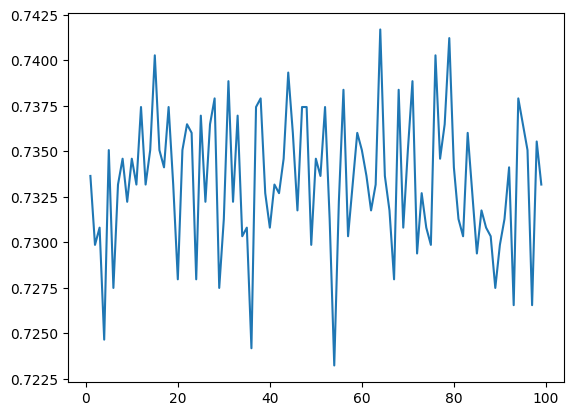

In [ ]:
plt.plot(range(1, 100), ran_state_accu)

In [ ]:
ran_value = ran_state_accu.index(max(ran_state_accu))+1
print(ran_value)

64


In [ ]:
dtree_model = DecisionTreeClassifier(criterion='gini', random_state = ran_value)
dtree_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=64)

In [ ]:
y_pred = dtree_model.predict(X_test)

In [ ]:
print("accuracy_score", accuracy_score(Y_test, y_pred))
print("classification_report", classification_report(Y_test, y_pred))

accuracy_score 0.7417061611374408
classification_report               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1557
           1       0.51      0.56      0.53       553

    accuracy                           0.74      2110
   macro avg       0.67      0.68      0.68      2110
weighted avg       0.75      0.74      0.75      2110



Grid_Search with Desicion Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dtree = DecisionTreeClassifier(random_state=ran_value)

grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
print("accuracy_score", accuracy_score(Y_test, y_pred))
print("classification_report", classification_report(Y_test, y_pred))

accuracy_score 0.7815165876777251
classification_report               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1557
           1       0.59      0.56      0.57       553

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110



**Random Forest Classifier **

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ran_value_accu = []
for ran_value in range(1, 100):
  random_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1, random_state =ran_value, max_features = "sqrt",
  max_leaf_nodes = 30)
  random_model.fit(X_train, Y_train)
  ran_value_accu.append(random_model.score(X_test, Y_test))

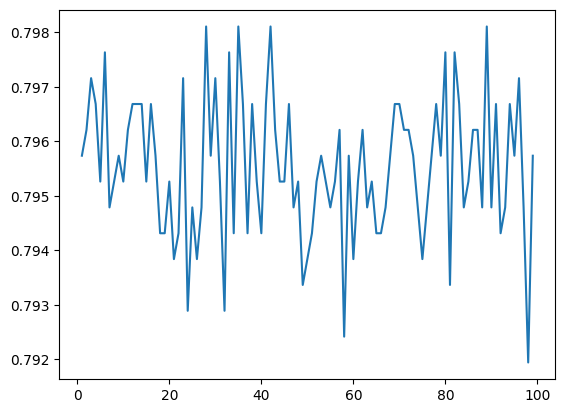

In [ ]:
plt.plot(range(1, 100), ran_value_accu)

In [ ]:
ran_value = ran_value_accu.index(max(ran_value_accu))+1
print(ran_value)

28


In [ ]:
random_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
random_state =ran_value, max_features = "sqrt", # Changed 'auto' to 'sqrt'
max_leaf_nodes = 30)
random_model.fit(X_train, Y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=28)

In [ ]:
y_pred = random_model.predict(X_test)

In [ ]:
print("accuracy_score", accuracy_score(Y_test, y_pred))
print("classification_report", classification_report(Y_test, y_pred))

accuracy_score 0.7981042654028436
classification_report               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1557
           1       0.66      0.48      0.55       553

    accuracy                           0.80      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.79      0.80      0.79      2110

